## K nearest neighbour

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ignoring the values

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset

df=pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
# Shape

print('Shape: ',df.shape)

Shape:  (590, 14)


In [5]:
# Checking null values

df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [6]:
# removing null values columns
# and also droping sample_id column since id is not important

df.drop(columns=['stage','benign_sample_diagnosis','plasma_CA19_9','REG1A','sample_id'],inplace=True)
df.head()

,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,Cohort1,BPTB,33,F,1,1.83222,0.893219,52.94884,654.282174
1,Cohort1,BPTB,81,F,1,0.97266,2.037585,94.46703,209.488250
2,Cohort2,BPTB,51,M,1,0.78039,0.145589,102.36600,461.141000
3,Cohort2,BPTB,61,M,1,0.70122,0.002805,60.57900,142.950000
4,Cohort2,BPTB,62,M,1,0.21489,0.000860,65.54000,41.088000


In [7]:
# Checking duplicated values

print('duplicated: ',df.duplicated().sum())

duplicated:  0


In [8]:
# Using label encoder on target feature

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['patient_cohort']=le.fit_transform(df['patient_cohort']).astype(int)
df['sample_origin']=le.fit_transform(df['sample_origin']).astype(int)
df['sex']=le.fit_transform(df['sex']).astype(int)
df.head()

,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,0,0,33,0,1,1.83222,0.893219,52.94884,654.282174
1,0,0,81,0,1,0.97266,2.037585,94.46703,209.488250
2,1,0,51,1,1,0.78039,0.145589,102.36600,461.141000
3,1,0,61,1,1,0.70122,0.002805,60.57900,142.950000
4,1,0,62,1,1,0.21489,0.000860,65.54000,41.088000


In [9]:
# shape of dataset after ohe

df.shape

(590, 9)

In [10]:
# Splitting the data into x and y

X=df.drop(columns='diagnosis', axis=1)
y=df.loc[:,'diagnosis']

X.shape, y.shape

((590, 8), (590,))

### MODEL DEVELOPMENT

In [11]:
### Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((413, 8), (177, 8), (413,), (177,))

In [12]:
# k nearest neighbour

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [13]:
# Y predict

y_predict=knn.predict(X_test)

In [14]:
# metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)

print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 66.66666666666666


classification report:
               precision    recall  f1-score   support

           1       0.53      0.68      0.60        47
           2       0.62      0.59      0.61        61
           3       0.85      0.72      0.78        69

    accuracy                           0.67       177
   macro avg       0.67      0.67      0.66       177
weighted avg       0.69      0.67      0.67       177



confusion matrix:
 [[32 14  1]
 [17 36  8]
 [11  8 50]]


Confusion matrix:
[[32 14  1]
 [17 36  8]
 [11  8 50]]


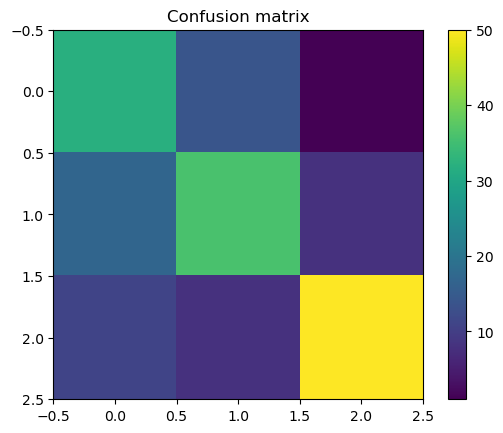

In [15]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(cm)
plot_confusion_matrix(cm)